# DESAFIO 0

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

In [102]:
# 1. LIBRARIES IMPORT
# 2. PRIMARY DATA OBSERVATION


In [103]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [104]:
# LEITURA INICIAL DOS DADOS

auto_industry = pd.read_csv('auto_industry.csv')
print("Data Sample:")
auto_industry.sample(10)

Data Sample:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
179,22.0,4,121.0,98.0,2945,14.5,75,europe,volvo 244dl
284,20.6,6,225.0,110.0,3360,16.6,79,usa,dodge aspen 6
222,17.0,8,260.0,110.0,4060,19.0,77,usa,oldsmobile cutlass supreme
74,13.0,8,302.0,140.0,4294,16.0,72,usa,ford gran torino (sw)
229,16.0,8,400.0,180.0,4220,11.1,77,usa,pontiac grand prix lj
201,18.5,6,250.0,110.0,3645,16.2,76,usa,pontiac ventura sj
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw)
230,15.5,8,350.0,170.0,4165,11.4,77,usa,chevrolet monte carlo landau
236,25.5,4,140.0,89.0,2755,15.8,77,usa,ford mustang ii 2+2
112,19.0,4,122.0,85.0,2310,18.5,73,usa,ford pinto


In [105]:
# OBSERVAÇÃO INICIAL: COLUMNS DATATYPES
auto_industry.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [106]:
auto_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [107]:
# OBSERVAÇÃO INICIAL: MEDIDAS DE DISPERÇÃO DOS ATRIBUTOS
auto_industry.describe().round()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.0,398.0,398.0,392.0,398.0,398.0,398.0
mean,24.0,5.0,193.0,104.0,2970.0,16.0,76.0
std,8.0,2.0,104.0,38.0,847.0,3.0,4.0
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0
25%,18.0,4.0,104.0,75.0,2224.0,14.0,73.0
50%,23.0,4.0,148.0,94.0,2804.0,16.0,76.0
75%,29.0,8.0,262.0,126.0,3608.0,17.0,79.0
max,47.0,8.0,455.0,230.0,5140.0,25.0,82.0


## Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

In [108]:
# OBSERVAÇÃO INICIAL: VERIFICANDO SE EXISTEM REGISTROS DUPLICADOS
auto_industry.duplicated().sum()

0

In [109]:
# OBSERVAÇÃO INICIAL: FORMA DOS DATATYPES. EXISTE ALGUMA VARIÁVEL COM VALORES NULL, NAN OU ""?
print("Records:")
print(auto_industry.shape)

print("\n" + "=>> ISNA:")
print(auto_industry.isna().sum()) 

print("\n" + "=>> ISNULL:")
print(auto_industry.isnull().sum()) 

print("\n" + "=>>" ":")
np.where(auto_industry.applymap(lambda x: x== ' '))


Records:
(398, 9)

=>> ISNA:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

=>> ISNULL:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

=>>:


(array([], dtype=int64), array([], dtype=int64))

In [110]:
auto_industry['horsepower'] = auto_industry['horsepower'].fillna(auto_industry['horsepower'].mean()) 
# DROPPING 6 NULL LINES 
#auto_industry.dropna(inplace=True)
print(auto_industry.shape)

(398, 9)


In [115]:
def validate_column_categorical(value):
    if type(value)==str and (re.search('[a-z]+',value) or re.search('[A-Z]+',value)):
        return True
    return False

In [116]:
# VALIDATING COMPLETION OF CATEGORIC COLUMNS
auto_industry[['origin', 'name']].applymap(validate_column_categorical).value_counts()

origin  name
True    True    398
dtype: int64

## Calcule quantos modelos foram lançados em anos pares

In [70]:
auto_industry.name.nunique()

301

In [117]:
auto_industry

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [124]:
#CONFERIR SE CONTO COM ÚNICO NOME

models_launched_in_even_years = auto_industry.name[auto_industry.model_year.map(lambda x: x%2== 0)].count()


print(f"Models launched in even years: {models_launched_in_even_years}")

Models launched in even years: 214


In [125]:
auto_industry

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Crie uma coluna para a marca do veículo e outra para o nome

In [129]:
auto_industry[['brand', 'name']] = auto_industry.name.str.split(" ", 1,expand=True).rename(columns = {0: 'brand', 1: 'name'})

In [131]:
auto_industry.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,torino,ford


## É posível identificar alguma relação entre mpg e acceleration?

In [148]:
# OBSERVANDO POSSIVEL RELAÇÃO:
auto_industry.plot.scatter(x='acceleration', y='mpg' )
z = np.polyfit(x='acceleration', y='mpg', 2)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# QUANTO MAIS TEMPO É GASTO NA ACELERAÇÃO, MAIS PODER DE DESLOCAMENTO POR GALÃO. ACELERAÇÃO E MPG SÃO DIRETAMENTE PROPORCIONAIS

SyntaxError: positional argument follows keyword argument (<ipython-input-148-8b72002c7b2a>, line 3)

## Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

In [146]:
auto_industry_usa = auto_industry.groupby(by=['origin']).get_group('usa')
auto_industry_usa.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,torino,ford


## Remova os elementos duplicados e crie uma tabela de consumo em (Km/L), altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

In [149]:
auto_industry.drop_duplicates(inplace=True)
auto_industry['Km/L'] = auto_industry['mpg'] * 0.425
auto_industry.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,Km/L
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevelle malibu,chevrolet,7.650
1,15.0,8,350.0,165.0,3693,11.5,70,usa,skylark 320,buick,6.375
2,18.0,8,318.0,150.0,3436,11.0,70,usa,satellite,plymouth,7.650
3,16.0,8,304.0,150.0,3433,12.0,70,usa,rebel sst,amc,6.800
4,17.0,8,302.0,140.0,3449,10.5,70,usa,torino,ford,7.225


In [78]:
def capitalize_column(column):
    return column.capitalize()

In [156]:
auto_industry['origin'] = auto_industry['origin'].map(capitalize_column)
auto_industry.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,Km/L
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevelle malibu,chevrolet,7.650
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,skylark 320,buick,6.375
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,satellite,plymouth,7.650
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,rebel sst,amc,6.800
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,torino,ford,7.225


## Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

In [159]:
#pivot_table_mpg = pd.pivot_table(data=auto_industry, index=['model_year'], columns=['cylinders'], values=['mpg'], aggfunc=np.mean)
#pivot_table_mpg

In [160]:
pivot_table_mpg = pd.pivot_table(data=auto_industry, index=['model_year', 'cylinders'], values=['mpg'], aggfunc=np.mean)
pivot_table_mpg

mpg
model_year cylinders           
70         4          25.285714
           6          20.500000
           8          14.111111
71         4          27.461538
           6          18.000000
           8          13.428571
72         3          19.000000
           4          23.428571
           8          13.615385
73         3          18.000000
           4          22.727273
           6          19.000000
           8          13.200000
74         4          27.800000
           6          17.857143
           8          14.200000
75         4          25.250000
           6          17.583333
           8          15.666667
76         4          26.766667
           6          20.000000
           8          14.666667
77         3          21.500000
           4          29.107143
           6          19.500000
           8          16.000000
78         4          29.576471
           5          20.300000
           6          19.066667
           8          19.050000
79         4          31.525000
           5          25.400000
           6          22.950000
           8          18.630000
80         3          23.700000
           4          34.612000
           5          36.400000
           6          25.900000
81         4          32.814286
           6          23.428571
           8          26.600000
82         4          32.071429
           6          28.333333

In [162]:
# OBSERVAÇÕES: CARROS COM 3 CILINDROS NÃO ESTÃO PRESENTES EM TODOS OS ANOS DE LANÇAMENTO


## Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [83]:
pivot_table_horsepower = pd.pivot_table(data=auto_industry, index=['origin'], columns=['cylinders'], values=['horsepower'], aggfunc=np.mean)
pivot_table_horsepower

horsepower                                              
cylinders          3          4          5           6           8
origin                                                            
Europe           NaN  78.311475  82.333333  113.500000         NaN
Japan          99.25  75.579710        NaN  115.833333         NaN
Usa              NaN  80.956522        NaN   99.671233  158.300971

In [163]:
pivot_table_horsepower = pd.pivot_table(data=auto_industry, index=['origin', 'cylinders'], values=['horsepower'], aggfunc=np.mean)
pivot_table_horsepower

horsepower
origin cylinders            
Europe 4           79.141885
       5           82.333333
       6          113.500000
Japan  3           99.250000
       4           75.579710
       6          115.833333
Usa    4           81.936224
       6           99.736073
       8          158.300971

## Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

Usa       245
Japan      79
Europe     68
Name: origin, dtype: int64

## Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

In [86]:
auto_industry['region'] = auto_industry['origin'].replace({'Usa':'North America', 'Japan':'Asia', 'Europe': 'Europe'})

In [87]:
auto_industry

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,Km/L,region
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevelle malibu,chevrolet,7.650,North America
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,skylark 320,buick,6.375,North America
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,satellite,plymouth,7.650,North America
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,rebel sst,amc,6.800,North America
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,torino,ford,7.225,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,mustang gl,ford,11.475,North America
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,pickup,vw,18.700,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,rampage,dodge,13.600,North America
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ranger,ford,11.900,North America


# Bônus - estatística

## Apresente a centralidade, desvio padrão e distribuição (histograma) das variáveis

In [89]:
auto_industry.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Km/L
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,9.964515
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.317128
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,3.825000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,7.225000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,9.668750
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,12.325000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,19.805000


In [92]:
auto_industry.applymap(np.mode())

AttributeError: module 'numpy' has no attribute 'mode'

In [96]:
auto_industry.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'brand', 'Km/L',
       'region'],
      dtype='object')

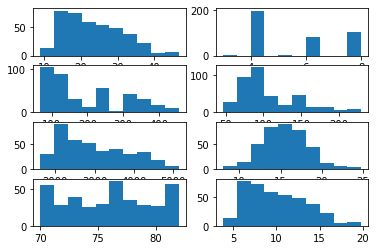

In [100]:
plt.subplot(4,2,1)
plt.hist(auto_industry['mpg'])

plt.subplot(4,2,2)
plt.hist(auto_industry['cylinders'])

plt.subplot(4,2,3)
plt.hist(auto_industry['displacement'])

plt.subplot(4,2,4)
plt.hist(auto_industry['horsepower'])

plt.subplot(4,2,5)
plt.hist(auto_industry['weight'])

plt.subplot(4,2,6)
plt.hist(auto_industry['acceleration'])

plt.subplot(4,2,7)
plt.hist(auto_industry['model_year'])

plt.subplot(4,2,8)
plt.hist(auto_industry['Km/L'])

plt.show()

## Gere um gráfico para mostrar a relação entre cada par de variável numérica.

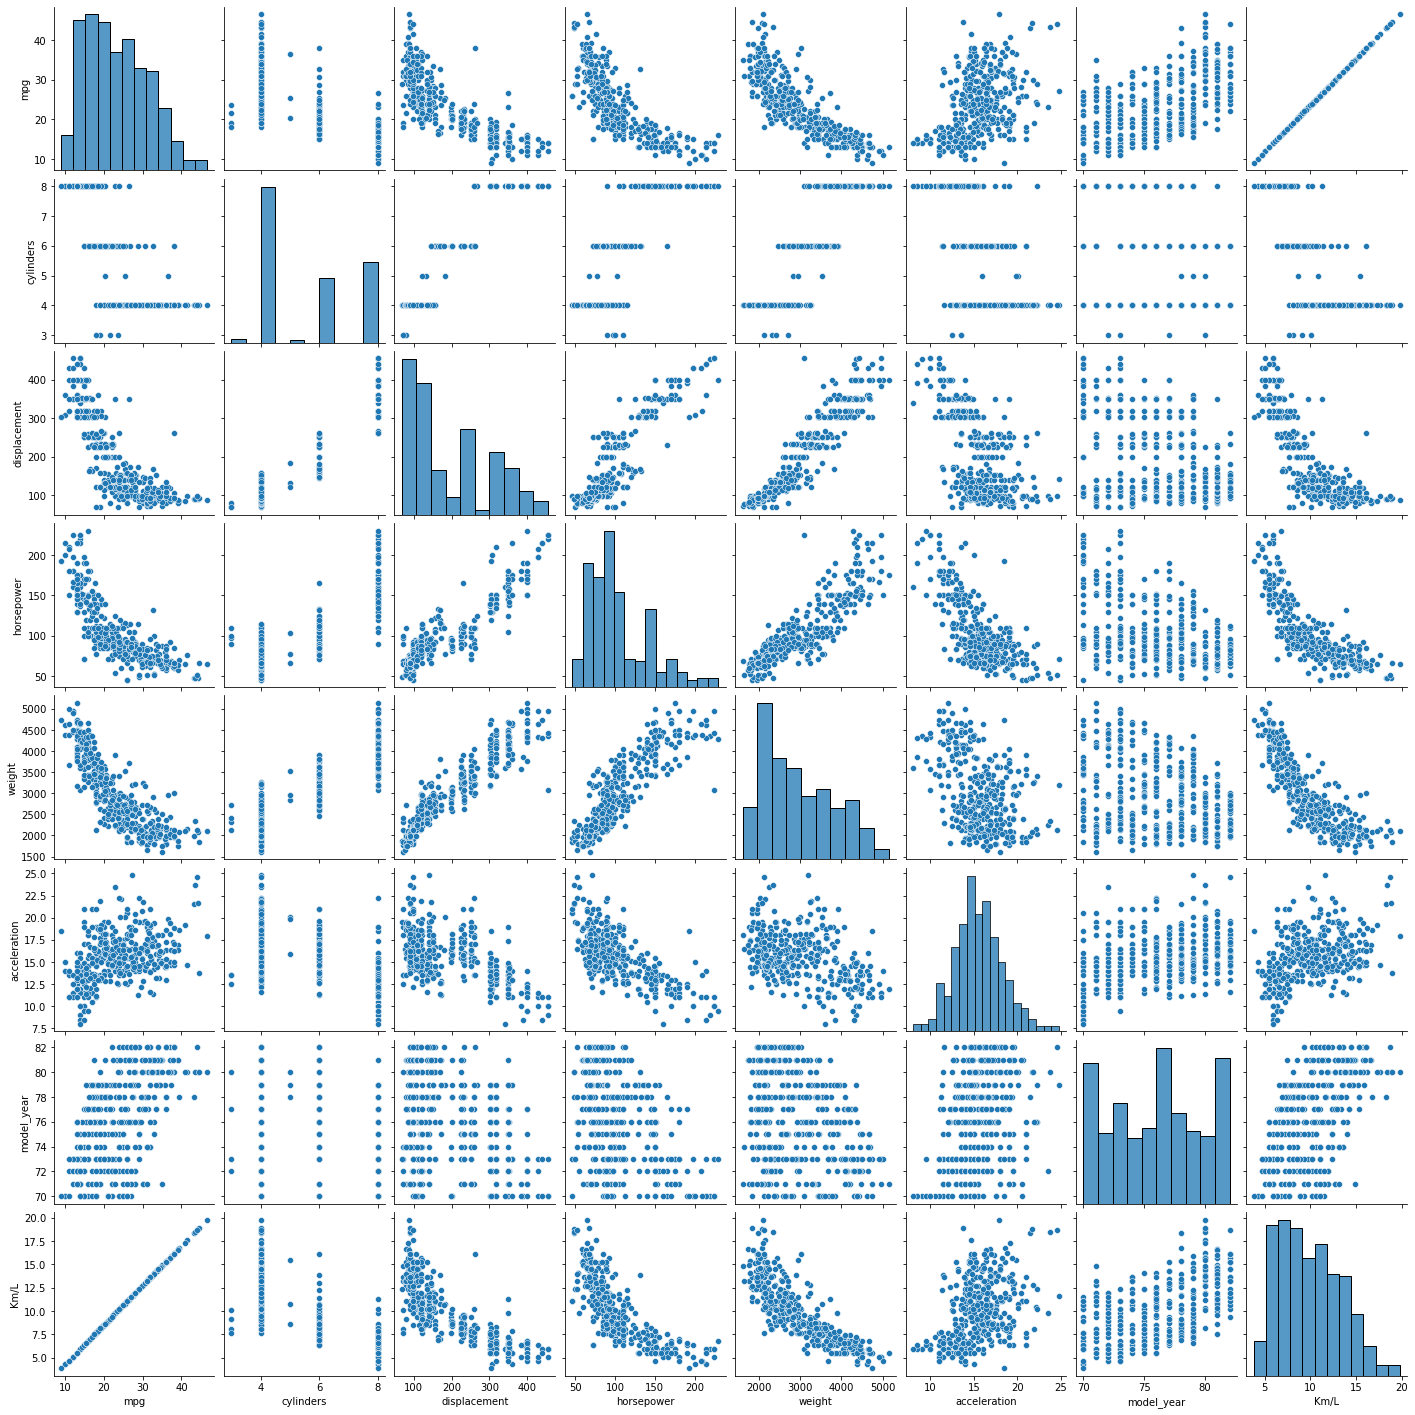

In [88]:
sns.pairplot(auto_industry)

# Bonus - DataViz

## Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

In [ ]:
tt

## Crie uma nova coluna com a relação peso/potência para cada veículo e um scatterplot dessa coluna com a de consumo que você criou 